In [2]:
# Recognize high dimensionality data
# choose ideal reduced dimensions
# apply pca transform before feeding data to next model


In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [8]:
digits = load_digits()
X = digits.data
y = digits.target

In [10]:
pca =  PCA(2)
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\vaibh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


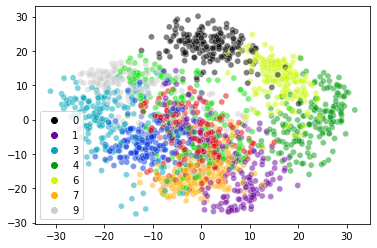

In [14]:
sns.scatterplot(Xproj[:,0], Xproj[:,1], hue = y, alpha = 0.5, palette = plt.cm.get_cmap('nipy_spectral', 10));

In [15]:
# Effect of PCA
X_ = pca.inverse_transform(Xproj)

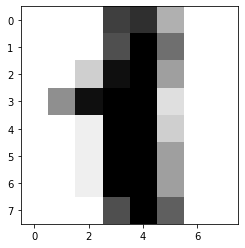

In [20]:
plt.imshow(X[1].reshape((8,8)),
          cmap = plt.cm.binary) 

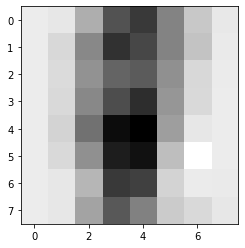

In [21]:
plt.imshow(X_[1].reshape((8,8)),
          cmap = plt.cm.binary) 

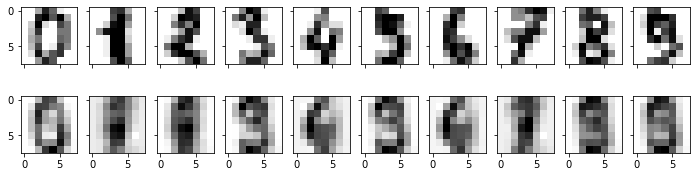

In [23]:
fig = plt.figure(figsize = (12,3))
axes = fig.subplots(2, 10, sharex=True, sharey=True)
for i in range(10):
    axes[0,i].imshow(X[i].reshape((8,8)), cmap=plt.cm.binary)
    
for i in range(10):
    axes[1,i].imshow(X_[i].reshape((8,8)), cmap=plt.cm.binary)

Chosing the right n_components<br>
Calculating the error in data<br>
-> simplest is RMSE<br>
--> explained variance

In [26]:
import numpy as np
# RMSE
np.sqrt(np.sum((X_ - X)**2)/len(X))

29.307759737803117

In [27]:
errors = []
for n_components in range(2,65):
    pca = PCA(n_components)
    Xproj = pca.fit_transform(X)
    X_ = pca.inverse_transform(Xproj)
    errors.append(np.sqrt(np.sum((X_ - X)**2)/len(X)))

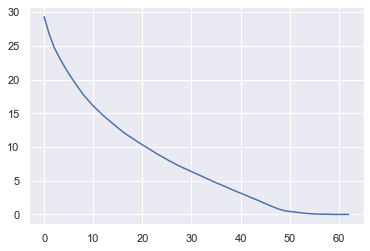

In [29]:
sns.set()
plt.plot(errors);

Text(0, 0.5, 'cumulative explained variance')

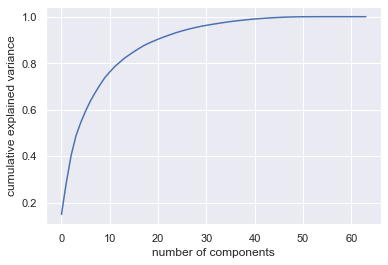

In [32]:
# Explained Variance
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

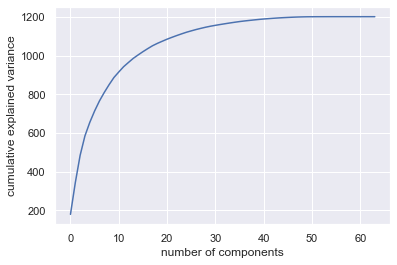

In [33]:
# Explained Variance
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

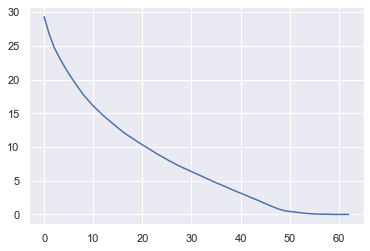

In [34]:
plt.plot(errors)

In [35]:
pca = PCA(20)
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 20)
